<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset
### The following describes the dataset variables:

    ·      CRIM - per capita crime rate by town

    ·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

    ·      INDUS - proportion of non-retail business acres per town.

    ·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

    ·      NOX - nitric oxides concentration (parts per 10 million)

    ·      RM - average number of rooms per dwelling

    ·      AGE - proportion of owner-occupied units built prior to 1940

    ·      DIS - weighted distances to five Boston employment centres

    ·      RAD - index of accessibility to radial highways

    ·      TAX - full-value property-tax rate per $10,000

    ·      PTRATIO - pupil-teacher ratio by town

    ·      LSTAT - % lower status of the population

    ·      MEDV - Median value of owner-occupied homes in $1000's

In [7]:
boston_df=boston_df.reset_index(drop=True)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2: Generate Descriptive Statistics and Visualizations

In [8]:
sns.set(style="whitegrid")

#### 2.1 For the "Median value of owner-occupied homes" provide a boxplot

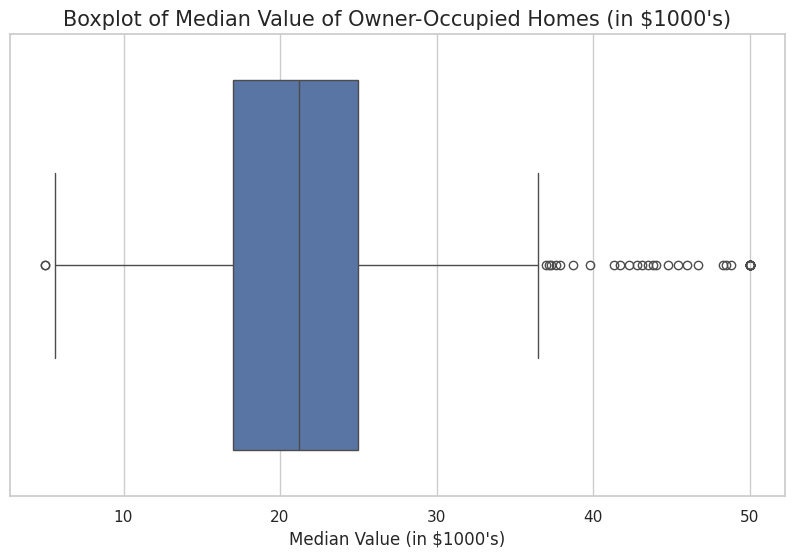

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot( x="MEDV",
                 data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes (in $1000\'s)', fontsize=15)
plt.xlabel('Median Value (in $1000\'s)', fontsize=12)
plt.show()

The boxplot above shows the median value for the variable MEDV among with outliers

#### 2.2 Provide a  bar plot for the Charles river variable

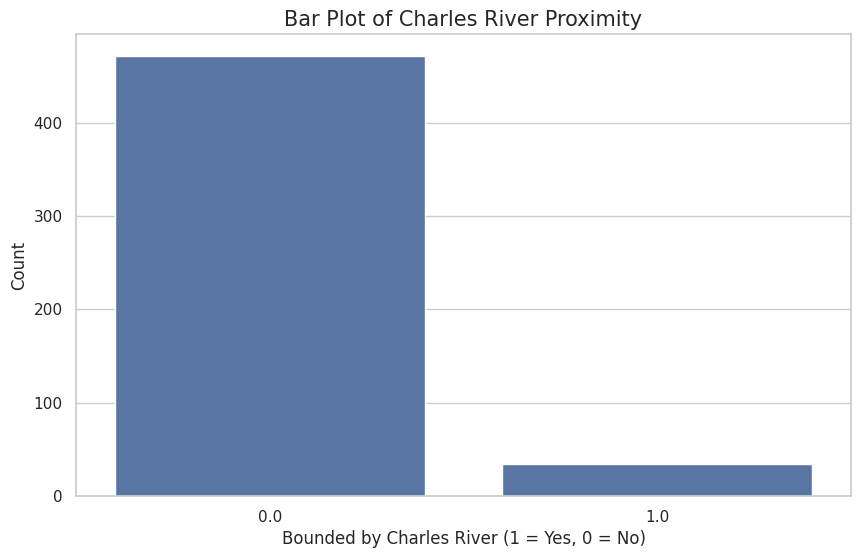

In [10]:
plt.figure(figsize=(10, 6))
ax2 = sns.countplot(x="CHAS", data=boston_df)
plt.title('Bar Plot of Charles River Proximity', fontsize=15)
plt.xlabel('Bounded by Charles River (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

The histogram shows that the majority of the houses are not near the Charles River

#### 2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [12]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


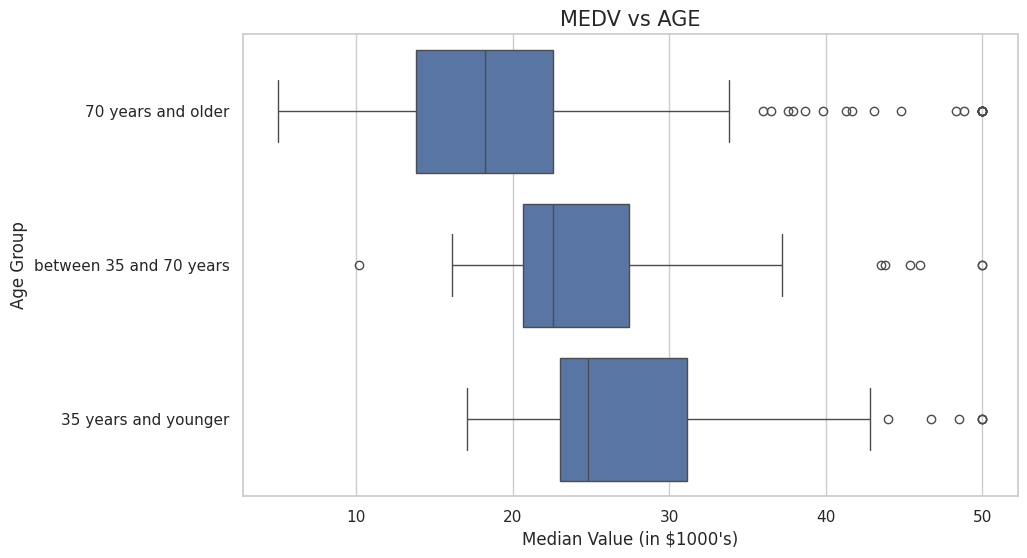

In [13]:
plt.figure(figsize=(10, 6))
age_order = ['70 years and older', 'between 35 and 70 years','35 years and younger']
ax3 = sns.boxplot( x="MEDV",y="age_group",
                 data=boston_df, order=age_order)
plt.title('MEDV vs AGE', fontsize=15)
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Median Value (in $1000\'s)', fontsize=12)
plt.show()

Double-click **here** for an alternative code.

<!--
# First, discretize the 'AGE' variable into the specified groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Create a boxplot for MEDV vs age_group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Homes (in $1000\'s)')
plt.show()
-->

The boxplot above shows that on average the median value of owner occupied homes is higher when the Age is lower

#### 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



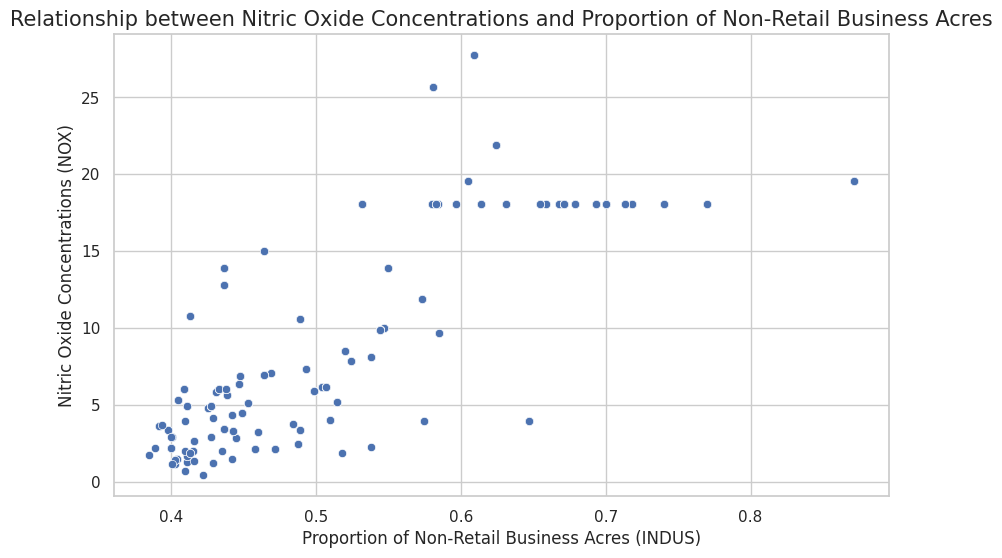

In [14]:
plt.figure(figsize=(10, 6))
ax4 = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df)
plt.title('Relationship between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres', fontsize=15)
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)', fontsize=12)
plt.ylabel('Nitric Oxide Concentrations (NOX)', fontsize=12)
plt.show()

There is a positive correlation between nitrogen oxide pollution levels and the proportion of land used for non-retail businesses in cities. In other words, areas with more non-retail businesses tend to have higher concentrations of nitrogen oxides in the air. This could indicate that industrial or commercial activity in these areas significantly contributes to air pollution.

#### 2.5 Create a histogram for the pupil to teacher ratio variable

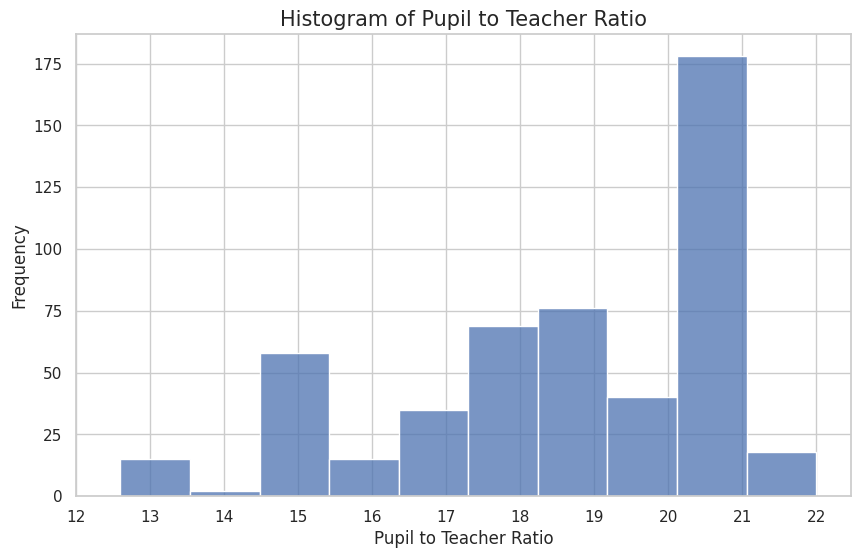

In [15]:
plt.figure(figsize=(10, 6))
ax5= sns.histplot(data=boston_df, x="PTRATIO", bins=10, kde=False)
plt.title('Histogram of Pupil to Teacher Ratio', fontsize=15)
plt.xlabel('Pupil to Teacher Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#another form of bins:
#bin_edges = ax5.patches[0].get_x()  # Obtener los bordes de los bins
#bin_edges = [patch.get_x() + patch.get_width() for patch in ax5.patches]
#plt.xticks(ticks=bin_edges)
max_x = boston_df["PTRATIO"].max()
min_x = boston_df["PTRATIO"].min()
plt.xticks(ticks=range(int(min_x),int(max_x) + 1))

plt.show()

Most schools or districts have a pupil-to-teacher ratio between 18 and 21.

# Task 3: Use the appropriate tests to answer the questions provided.

#### For each of the following questions
* Be sure to:

* State your hypothesis.

* Use α = 0.05

* Perform the test Statistics.

* State the conclusion from the test.

<ipython-input-16-46e1746f72db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax6 = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

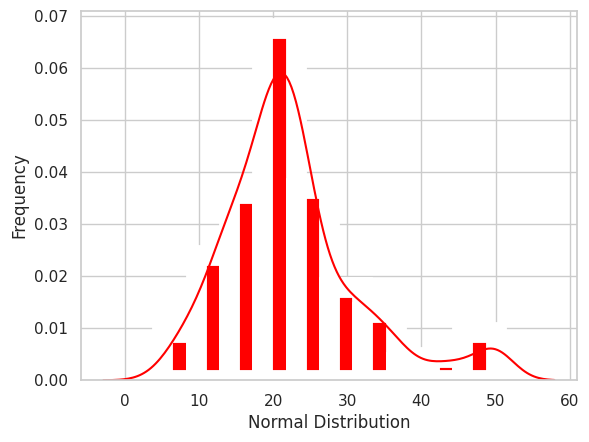

In [16]:
ax6 = sns.distplot(boston_df['MEDV'],
                  bins=10,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax6.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume that MEDV it is normal

#### 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")

In [17]:
CHAS_no=boston_df[boston_df['CHAS'] == 0]
CHAS_yes=boston_df[boston_df['CHAS'] == 1]

In [18]:

scipy.stats.levene(CHAS_no['MEDV'],
                   CHAS_yes['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value for the Levene test is less than 0.05, the hypothesis that the variances are equal is rejected.

In [19]:
scipy.stats.ttest_ind(CHAS_yes['MEDV'],
                   CHAS_no['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since the p-value for the t-test is less than 0.05, we reject the null hypothesis. This indicates that there is sufficient evidence to conclude that there is a significant difference in the median value of houses bounded by the Charles River.

#### 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [21]:
lower= boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
between=boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
older=boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
scipy.stats.levene(lower,between, older, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [22]:
f_statistic, p_value = scipy.stats.f_oneway(lower, between, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

#### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide is correlated with proportion of non-retail business acres per town

In [24]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [25]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        22:22:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An additional unit of distance to the Boston employment centers increases the median value of owner-occupied homes by approximately 1.09 units.